<div class="alert alert-success">
<h3> To be transated...</h3>

</div>

# Исследование объявлений о продаже квартир

### Введение
Планируется провести исследовательский анализ стоимости квартир в Санкт-Петербурге и соседних населённых пунктах по данным за несколько лет.

Будут изучены параметры и построены гистограммы для следующих параметров: 
- площадь
- цена
- цена квадратного метра
- число комнат
- высота потолков
- время продажи квартиры
- расстояние до центра города
- этаж
- дата размещения

Будет проведена оценка влияния параметров квартиры на ее стоимость. Отдельное исследование будет проведено для Санкт-Петербурга и его центра.

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


45.0      880
60.0      538
7.0       234
30.0      208
90.0      204
         ... 
1110.0      1
1049.0      1
951.0       1
693.0       1
773.0       1
Name: days_exposition, Length: 1141, dtype: int64

1580.0

1.0

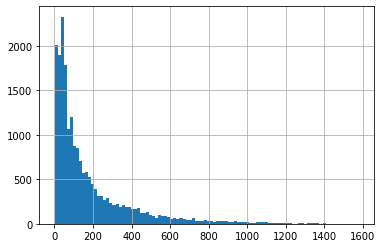

In [348]:
# Импортируем основные библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

flats = pd.read_csv("/datasets/real_estate_data.csv", sep="\t")
flats.info()
display(flats)

# Проводим первичный анализ исходных данных по столбцам
col = 'days_exposition'
display(flats[col].value_counts())#.sort_index().head(50)) 
display(flats[col].max())
display(flats[col].min())
display(flats[col].hist(bins=100))#, range=(0, 10)))

### Результаты предварительного анализа

---
Общее количество записей: 23699.

---
Имеются пропуски в столбцах: ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition.

---
Количество изображений пик (нормальный) на 10 изображениях и одиночный на 20. Аномалий нет.

---
Диапазон цен: от 12 190 руб. до 763 000 000 руб.

---
Общая площадь: от 12 до 900 кв. м.

---
Количество комнат: от 1 до 19.

---
Высота потолков: от 1 до 100 м. Имеются явно аномальные значения. Выстоты до 2 м и выше 4.50 скорее всего являются недостоверными данными (количество таких записей небольшое).

---
Количество этажей в доме: от 1 до 60.

---
Жилая площадь: от 2 до 409.7. Значения менее 9 кв. м. выглядят подозрительно.

---
Этаж: от 1 до 33. Больше всего квартир из 5-этажек, на втором месте 9-этажные дома.

---
Квартира: да - 50, нет - 2725.

---
Студия: да - 149, нет - 23550.

---
Открытая планировка: да - 67, нет - 23632.

---
Площадь кухни: от 1.3 до 112 кв. м. Значения менее 5 кв. м. выглядят подозрительно.

---
Количество балконов: от 0 до 5.

---
Количество населенных пунктов: 364. Больше половины - в Санкт-Петербурге.

---
Расстояние до аэропорта: от 6450 м до 84869 м. Имеется одно значение 0.0 м, явно ошибочное.

---
Расстояние до центра города: от 181 м до 65968 м.

---
Количество парков в радиусе 3000 м: от 0 до 3.

---
Расстояние до ближайшего парка: от 1 м до 3190 м.

---
Количество водоемов в радиусе 3000 м: от 0 до 3.

---
Расстояние до ближайшего водоема: от 13 м до 1344 м.

---
Длительность размещения объявления: от 1 до 1580 дней. Наибольшее количество приходится на 45 и на 60 дней. Вероятно это границы автоматического снятия размещения объявлений.

### Шаг 2. Предобработка данных

### Заполняем пропуски:

In [349]:
# Заполняем пропуски is_apartment: если floors_total == 1, то ставим признак False
flats.loc[(flats['floors_total'] == 1) & (flats['is_apartment'].isnull()), 'is_apartment'] = False
# Убедились, что все получилось
display(flats[(flats['floors_total'] == 1) & flats['is_apartment'].isnull()].shape)

(0, 22)

In [350]:
# Заполняем пропуски balcony
flats.loc[flats['balcony'].isnull(), 'balcony'] = 0
# Убедились, что все получилось
display(flats[flats['balcony'].isnull()].shape)

(0, 22)

### Приводим типы данных в соответствие содержимому:

In [351]:
# Преобразуем столбец first_day_exposition в datetime
flats['first_day_exposition'] = pd.to_datetime(flats['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

# Столбцы 'floors_total','balcony','parks_around3000','ponds_around3000' преобразуем в целочисленный тип
flats[['floors_total','balcony','parks_around3000','ponds_around3000']] = (
    flats[['floors_total','balcony','parks_around3000','ponds_around3000']].astype('Int64')
)

# В столбце days_exposition обнаружены не целые значения, которые не могут быть преобразованы в int
display(flats['days_exposition'][23695])
# Перед изменением типа округляем до целого
flats['days_exposition'] = round(flats['days_exposition'], 0).astype('Int64')

# Сохраним индексы строк, где is_apartment = NaN, для использования при необходимости
ind_is_apartment_nan = flats[flats['is_apartment'].isna()].index
# Преобразуем столбец is_apartment в boolean
flats['is_apartment'] = flats['is_apartment']==True

# Убедились в замене
display(flats.info())

45.00000000000001

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null Int64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null Int64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null Int64
parks_nearest           8079 non-null float64
ponds_around30

None

### Выводы по замене данных
---
#### Особенности данных
- Имеются пропущеенные значения. Вероятная причина для вручную вводимых данных - не указал пользователь, для автоматически собираемых данных - не ведется учет в данной локации.
- Имеются данные, хранящиеся в переменных не подходящего типа

---
#### Заполнили пропущенные данные
1. is_apartment - заполнили следующим образом: если floors_total == 1, то ставим признак False
2. balcony - если данные отсутствуют, то указваем значение 0 (это наиболее вероятная причина пропуска)
3. Остальные оставляем как есть, поскольку нет дополнительных данных для заполнения (адрес, расположение на площадке и т.п.)

---
#### Привели тип данных в соответствие содержимому
1. `first_day_exposition` меняем на datetime
2. `floors_total`         меняем на int
3. `is_apartment`         меняем на bool
4. `balcony`              меняем на int
5. `parks_around3000`     меняем на int
6. `ponds_around3000`     меняем на int
7. `days_exposition`      меняем на int


### Шаг 3. Посчитайте и добавьте в таблицу

#### Добавляем цену квадратного метра

In [352]:
# Добавляем цену квадратного метра
flats['m2_price'] = flats['last_price'] / flats['total_area']
# Убедились, что все получилось
display(flats['m2_price'].head())

0    120370.370370
1     82920.792079
2     92785.714286
3    408176.100629
4    100000.000000
Name: m2_price, dtype: float64

#### Добавляем день недели публикации объявления

In [353]:
# Добавляем день недели публикации объявления
flats['weekday_exposition'] = flats['first_day_exposition'].dt.weekday
# Убедились, что все получилось
display(flats['weekday_exposition'].head())

0    3
1    1
2    3
3    4
4    1
Name: weekday_exposition, dtype: int64

#### Добавляем месяц публикации объявления

In [354]:
# Добавляем месяц публикации объявления
flats['month_exposition'] = flats['first_day_exposition'].dt.month
# Убедились, что все получилось
display(flats['month_exposition'].head())

0     3
1    12
2     8
3     7
4     6
Name: month_exposition, dtype: int64

#### Добавляем год публикации объявления

In [355]:
# Добавляем год публикации объявления
flats['year_exposition'] = flats['first_day_exposition'].dt.year
# Убедились, что все получилось
display(flats['year_exposition'].head())

0    2019
1    2018
2    2015
3    2015
4    2018
Name: year_exposition, dtype: int64

#### Добавляем признак этажа квартиры

In [356]:
# Добавляем признак этажа квартиры: варианты — первый, последний, другой, если этаж всего один - указываем первый,
## если floors_total не заполнен - оставляем NaN
def get_floor_type(row):
    try:
        floors_total = row['floors_total']
        floor = row['floor']
        
        if (floors_total == 1) | (floor == 1): # Исправлено здесь
            return 0 #'Первый'
        
        if floor == floors_total:
            return 1 #'Последний'
        
        if np.isnan(floors_total):
            return np.nan
        
        return 2 #'Другой'
    
    except:
        return np.nan
        
# Создадим словарь для признака этажа
row_type_floor = [[0, 'Первый'], [1, 'Последний'], [2, 'Другой']] 
columns_type_floor = ['floor_id', 'type_floor']
type_floor_dict = pd.DataFrame(data=row_type_floor, columns=columns_type_floor)
display(type_floor_dict)

# Применяем функцию
flats['floor_type'] = flats.apply(get_floor_type, axis=1)
# Убедились, что все получилось
display(flats['floor_type'].value_counts())

,floor_id,type_floor
0,0,Первый
1,1,Последний
2,2,Другой


2.0    17363
1.0     3336
0.0     2917
Name: floor_type, dtype: int64

In [357]:
display(flats[flats['floor'] == 1]['last_price'].count())

2917

#### Добавляем отношение жилой площади к общей

In [358]:
# Добавляем отношение жилой площади к общей
flats['living_to_total_ratio'] = flats['living_area'] / flats['total_area']
# Убедились, что все получилось
display(flats['living_to_total_ratio'].head())

0    0.472222
1    0.460396
2    0.612500
3         NaN
4    0.320000
Name: living_to_total_ratio, dtype: float64

#### Добавляем отношение площади кухни к общей

In [359]:
# Добавляем отношение площади кухни к общей
flats['kitchen_to_total_ratio'] = flats['kitchen_area'] / flats['total_area']
# Убедились, что все получилось
display(flats['kitchen_to_total_ratio'].head())


0    0.231481
1    0.272277
2    0.148214
3         NaN
4    0.410000
Name: kitchen_to_total_ratio, dtype: float64

#### Проверяем наличие дубликатов

In [360]:
display(flats.duplicated().sum())

0

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

### Проведем первичный анализ данных:

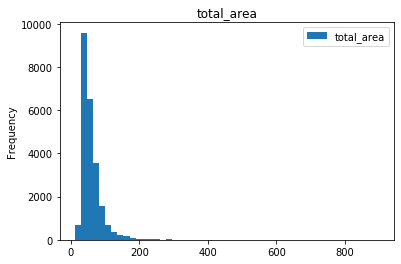

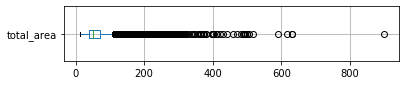

Максимум: 900.0


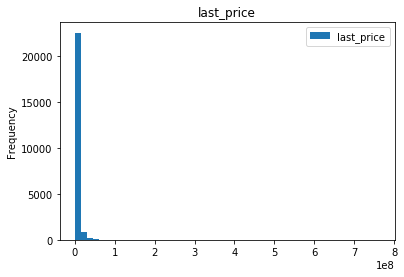

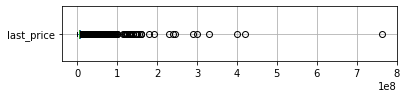

Максимум: 763000000.0


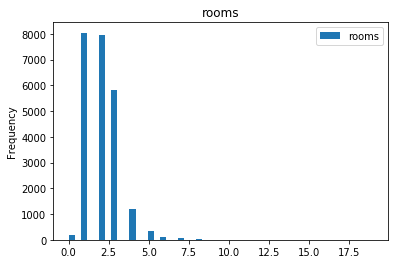

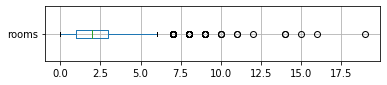

Максимум: 19


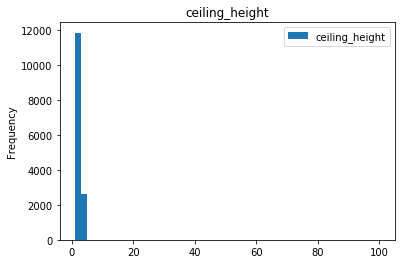

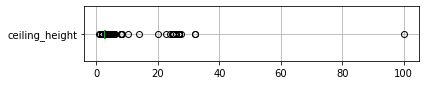

Максимум: 100.0


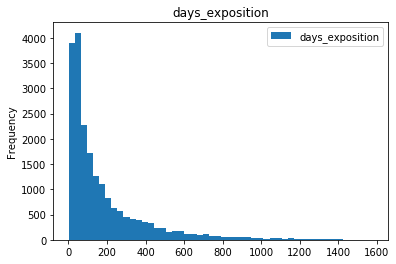

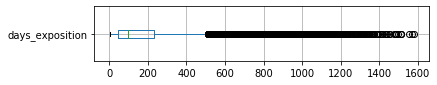

Максимум: 1580


In [361]:
# Содаем список столбцов, по которым построим графики
list_col = ['total_area', 'last_price', 'rooms', 'ceiling_height', 'days_exposition']

# Строим в цикле гистограммы и диаграммы размаха
for name_col in list_col:
    flats.plot(kind='hist', y=name_col, title=name_col, bins=50)
    plt.figure(figsize=(6, 1))
    flats.boxplot(name_col, vert=False)
    plt.show()
    print('Максимум:', flats[name_col].max())

#### Вывод по первичному анализу
- Площадь имеет выбросы в области значений выше 150 м. кв., максимальное значение 900
- Цена квартир имеет выбросы в области значений выше около 20 млн. руб., максимальное значение 763 млн. руб.
- Количество комнат имеет выбросы в области значений выше 7, максимальное значение 19.
- Высота потолков имеет значительные выбросы в области значений выше около 5 м, максимальное значение 100 м.
- Время размещения имеет значительные выбросы в области значений выше около 500 дней, максимальное значение 1580 дней.

### Создадим функцию для удаления выбросов, редких значений:

In [362]:
# Создаем функцию для обрезания "хвостов" и вывода гистограммы, диаграммы разброса и основных статистических параметров
def cut_waste(namecol, vmin, vmax, nbins):
    new_data = flats.query(str(vmin) + '<=' + namecol + '<=' + str(vmax))
    plt.figure()
    new_data[namecol].plot(kind='hist', bins=nbins, range=(vmin, vmax))
    plt.show()
    
    plt.figure(figsize=(6, 1))
    flats.boxplot(namecol, vert=False)
    plt.xlim(vmin, vmax)
    plt.yticks(rotation=90)
    plt.show()
    
    display(new_data[namecol].describe())
    
    return new_data

### Уберем "хвосты" - выбросы, редкие значения. Сохраним данные в соответствующих переменных:

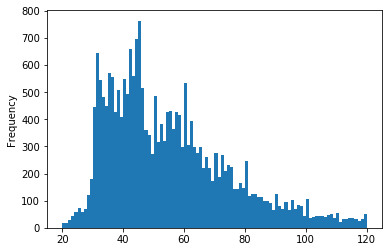

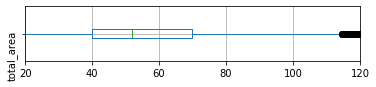

count    22610.000000
mean        54.906878
std         20.066536
min         20.000000
25%         39.600000
50%         50.500000
75%         66.000000
max        120.000000
Name: total_area, dtype: float64

In [363]:
# Общая площадь
good_data_total_area = cut_waste('total_area', 20, 120, 100)

#### Вывод
На гистограмме площади наблюдаются выраженные пики в области 30-35, 45, 55-60 кв.м., что вероятнее всего соответствует одно- двух- и трехкомнатным квартирам.

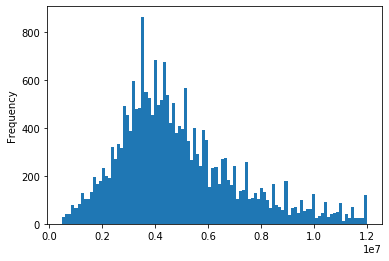

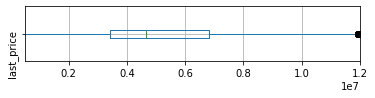

count    2.174400e+04
mean     4.882168e+06
std      2.271344e+06
min      5.000000e+05
25%      3.300000e+06
50%      4.425000e+06
75%      6.000000e+06
max      1.200000e+07
Name: last_price, dtype: float64

Санкт-Петербург            1869
Пушкин                       30
Сестрорецк                   11
Петергоф                      4
посёлок Стрельна              3
Гатчина                       2
Зеленогорск                   2
Колпино                       2
Красное Село                  2
посёлок Александровская       1
деревня Бор                   1
деревня Новое Девяткино       1
Всеволожск                    1
Кронштадт                     1
посёлок Репино                1
деревня Кудрово               1
Павловск                      1
Выборг                        1
Сертолово                     1
Кудрово                       1
Name: locality_name, dtype: int64

In [364]:
# Цена
good_data_last_price = cut_waste('last_price', 500000, 12000000, 100)

# Дополнительно посмотрим на города, где цены выше 12 млн.
location_big_price = flats.query('last_price > 12000000')['locality_name'].value_counts()
display(location_big_price)

#### Вывод
Распределение близко к нормальному. Наибольшее количество квартир продается по ценам от 3,5 до 4,5 млн. руб. Средняя цена - 4,8 млн. руб. Подавляющее большинство дорогих квартир, с ценником выше 12 млн. руб. расположены в Санкт-Петербурге.

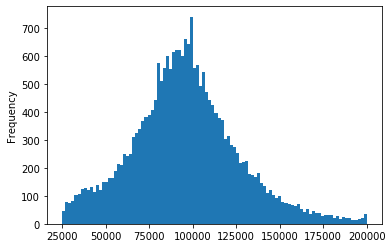

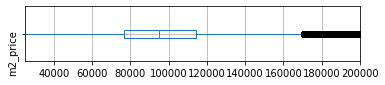

count     22910.000000
mean      95743.508827
std       30469.746193
min       25000.000000
25%       76923.076923
50%       94696.969697
75%      112872.788945
max      200000.000000
Name: m2_price, dtype: float64

In [365]:
# Цена квадратного метра
good_data_m2_price = cut_waste('m2_price', 25000, 200000, 100)

#### Вывод
Распределение близко к нормальному. Наблюдается выраженный пик на цене 100 тыс. руб за кв. м. - людям свойственно округлять стоимость до "красивых" значений.

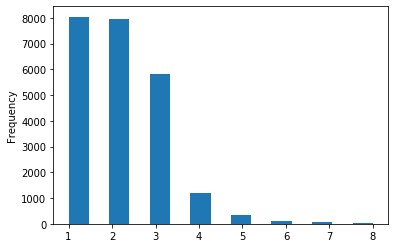

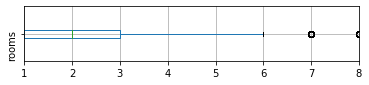

count    23483.000000
mean         2.080569
std          1.030775
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: rooms, dtype: float64

In [366]:
# Количество комнат
good_data_rooms = cut_waste('rooms', 1, 8, 15)

#### Вывод
- Большинство продаваемых квартир одно- и двухкомнатные (почти одинаковое количество). 
- Трехкомнатных примерно на 25 % меньше однокомнатных. 
- Четырехкомнатных примерно в 8 раз меньше однокомнатных.
- Остальных квартир значительно меньше.

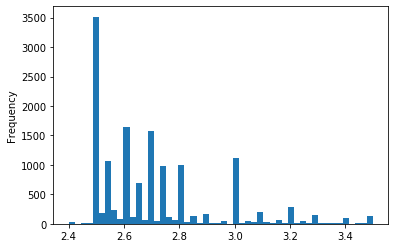

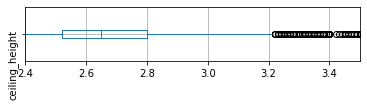

count    14179.000000
mean         2.705242
std          0.222906
min          2.400000
25%          2.500000
50%          2.650000
75%          2.800000
max          3.500000
Name: ceiling_height, dtype: float64

In [367]:
# Высота потолков
good_data_ceiling_height = cut_waste('ceiling_height', 2.4, 3.5, 50)

#### Вывод
Подавляющее количество квартир имеет высоту потолков 2,5 м. Наиболее значительная часть квартир на рынке с потолками в диапазоне от 2,5 до 3 метров.

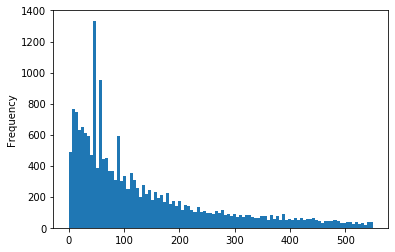

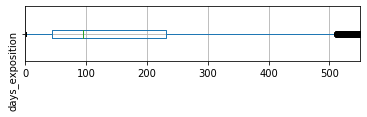

count    19051.000000
mean       133.031442
std        127.757847
min          1.000000
25%         42.000000
50%         87.000000
75%        188.000000
max        550.000000
Name: days_exposition, dtype: float64

In [368]:
# Время размещения
good_data_days_exposition = cut_waste('days_exposition', 0, 550, 100)

#### Вывод
Среднее время размещения объявления - 180 дней, медианное время продажи - 95 дней. Распределение близко к распределению Пуассона. Значения попадающие в первый квартиль можно отнести к быстрым продажам (до 45 дней), значения выше "ящика" диаграммы размаха можно отнести к долгим продажам (> 232 дней). Значения выше «усов» диаграммы размаха (> 512 дней) можно отнести к очень долгим продажам.

In [369]:

len(flats) / 23699 * 100

100.0

In [370]:
flats_for_spb = flats
flats = flats.query('(50000 <= last_price <= 12000000) and (20 <= total_area <= 120)')
display(len(flats) / 23699 * 100)

91.11776868222287

### Построим корреляционные матрицы:

In [371]:
# Строим корреляционную матрицу параметров: цена - цена кв. м. - площадь - количество комнат - расстояние до центра
# m2_rooms_center = pd.concat([good_data_last_price['last_price'], good_data_m2_price['m2_price'], good_data_total_area['total_area'] , good_data_rooms['rooms'], flats['cityCenters_nearest']], axis=1)
# plt.figure()
# pd.plotting.scatter_matrix(m2_rooms_center, figsize=(9, 9))
# plt.show()
# m2_rooms_center.corr()

In [372]:
### Код ревьювера ###
(flats
     .corr()['last_price']
     .to_frame()
     .sort_values('last_price', ascending=False)
     .style
     .background_gradient(cmap="Greens")
)

,last_price
last_price,1
total_area,0.702704
m2_price,0.629071
living_area,0.577314
kitchen_area,0.48547
rooms,0.439764
floors_total,0.190706
total_images,0.160584
ponds_around3000,0.149768
floor_type,0.149027


*Отобразим эти зависимости графически:*

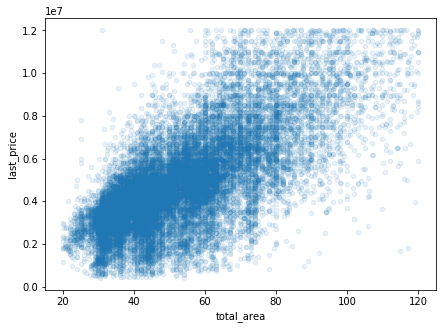

Коэффициент корреляции цены с площадью:  0.7027043525611608


In [373]:
# Зависимость площадь-цена
flats.plot(x='total_area', y='last_price', figsize=(7, 5), kind='scatter', alpha=0.1)
plt.show()
print('Коэффициент корреляции цены с площадью: ', flats['total_area'].corr(flats['last_price']))

Корреляцию наглядно видно на графике: цены растут с увеличением площади.

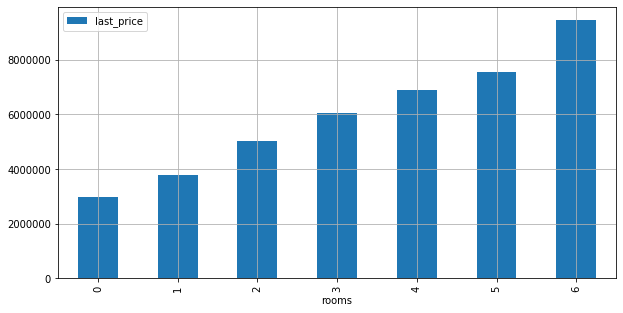

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Коэффициент корреляции цены с количеством комнат:  0.43976408145985085


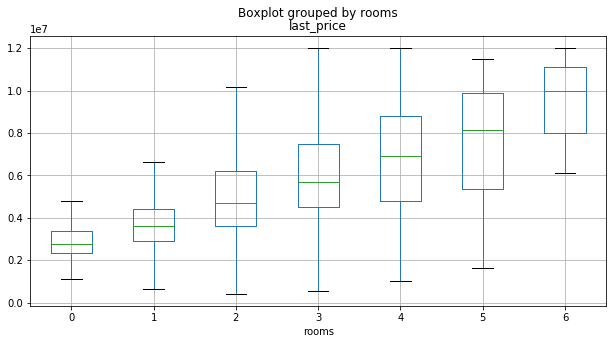

In [403]:
# Зависимость количество комнат-цена
flats.pivot_table(index='rooms', values='last_price').plot(kind='bar', y='last_price', figsize=(10, 5),grid=True)
plt.show()
flats.boxplot('last_price', by='rooms', showfliers=False, figsize=(10, 5))
print('Коэффициент корреляции цены с количеством комнат: ', flats['rooms'].corr(flats['last_price']))

Чем больше комнат в квартире, тем выше ее средняя и медианная цена. Для 6 комнатных квартир можно отметить резкий рост нижней ценовой границы по сравнению с остальными квартирами.

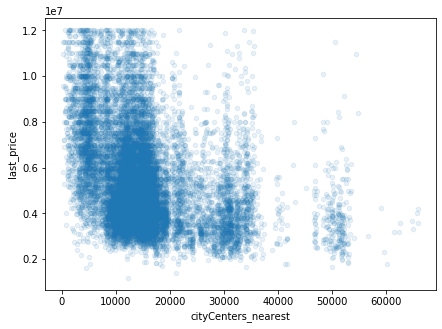

In [375]:
# Зависимость расстояние до центра-цена
flats.plot(x='cityCenters_nearest', y='last_price', figsize=(7, 5), kind='scatter', alpha=0.1)
plt.show()

Наглядно видно, что чем больше расстояние до центра города, тем ниже цены.

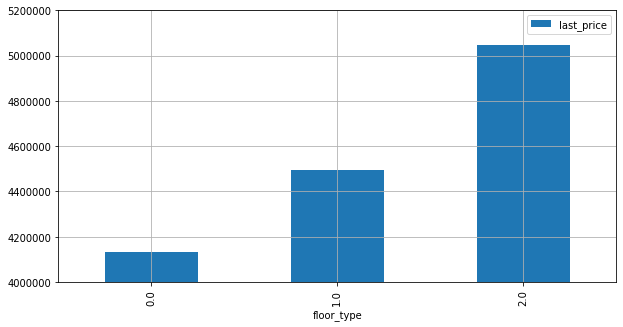

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


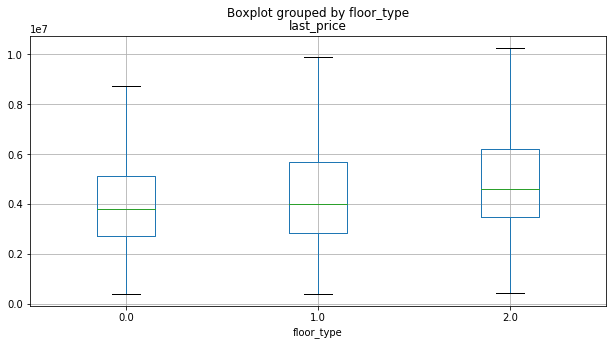

In [402]:
# Зависимость тип этажа-цена
flats.pivot_table(index='floor_type', values='last_price').plot(kind='bar', y='last_price', figsize=(10, 5), ylim=(4000000, 5200000), grid=True)
plt.show()
flats.boxplot('last_price', by='floor_type', showfliers=False, figsize=(10, 5))

У первого этажа самая низкая средняя (около 4,1 млн.) и медианная цена (около 3,9 млн), а также самый меньший разброс цен. Средняя цена последнего этажа около 4,5 млн. Самые высокие цены у типа этажа "Другой" - средняя цена около 5,1 млн.

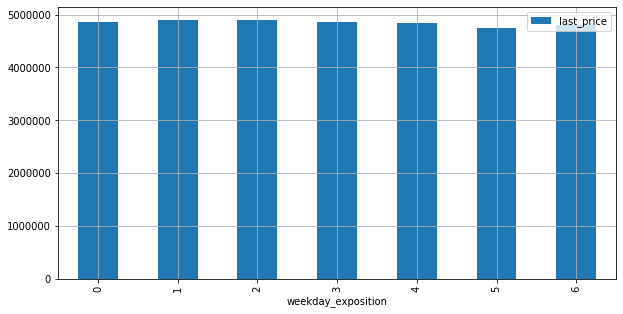

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


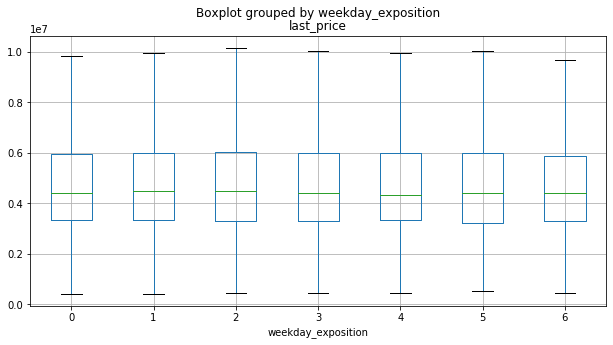

In [404]:
# Зависимость день недели размещения-цена
flats.pivot_table(index='weekday_exposition', values='last_price').plot(kind='bar', y='last_price', figsize=(10, 5),grid=True)
plt.show()
flats.boxplot('last_price', by='weekday_exposition', showfliers=False, figsize=(10, 5))

От дня недели размещения объявления цена практически не зависит.

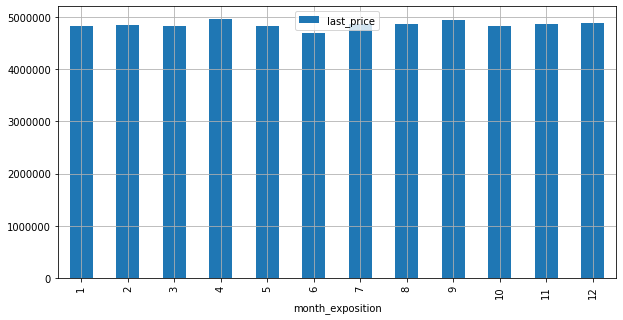

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


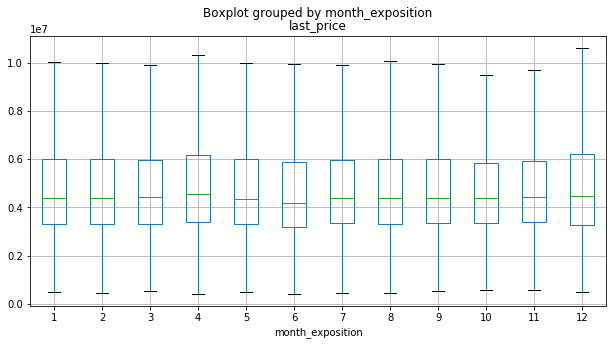

In [405]:
# Зависимость месяц размещения-цена
flats.pivot_table(index='month_exposition', values='last_price').plot(kind='bar', y='last_price', figsize=(10, 5),grid=True)
plt.show()
flats.boxplot('last_price', by='month_exposition', showfliers=False, figsize=(10, 5))

От месяца размещения объявления цена также практически не зависит.

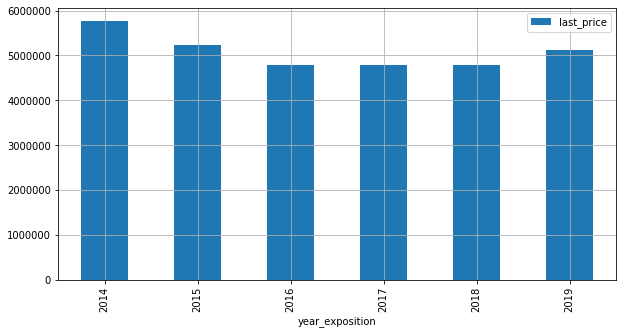

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


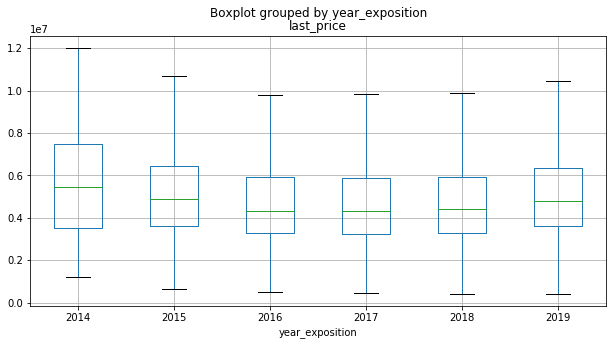

0.828187311851948

1.0713302087293601

In [406]:
# Зависимость год размещения-цена
flats.pivot_table(index='year_exposition', values='last_price').plot(kind='bar', y='last_price', figsize=(10, 5),grid=True)
plt.show()
flats.boxplot('last_price', by='year_exposition', showfliers=False, figsize=(10, 5))
plt.show()

p2014 = flats.pivot_table(index='year_exposition', values='last_price').loc[2014, 'last_price']
p2016 = flats.pivot_table(index='year_exposition', values='last_price').loc[2016, 'last_price']
p2018 = flats.pivot_table(index='year_exposition', values='last_price').loc[2018, 'last_price']
p2019 = flats.pivot_table(index='year_exposition', values='last_price').loc[2019, 'last_price']
display(p2016/p2014)
display(p2019/p2018)

C 2014 по 2016 годы средние цены упали примерно на 17 %. В 2019 году отметился рост к 2018 году около 7 %.

#### Вывод
Цена квартиры имеет прямую зависимость от следующих параметров в порядке убывания коэффициента корреляции Пирсона:
- общая площадь
- цена квадратного метра
- жилая площадь
- площадь кухни
- количество комнат

Цена квартиры имеет обратную зависимость от расстояния до центра города.

In [380]:
# Строим корреляционную матрицу параметров: цена - цена кв. м. - этаж - признак этажа
# m2_floor_floor_type = pd.concat([good_data_last_price['last_price'], good_data_m2_price['m2_price'], flats['floor'], flats['floor_type']], axis=1)
# plt.figure()
# pd.plotting.scatter_matrix(m2_floor_floor_type, figsize=(9, 9))
# plt.show()
# m2_floor_floor_type.corr()

In [381]:
# Строим корреляционную матрицу параметров: цена - цена кв. м. - неделя размещени -месяц размещение - год размещения
# m2_w_m_y_exposition = pd.concat([good_data_last_price['last_price'], good_data_m2_price['m2_price'], flats['weekday_exposition'], flats['month_exposition'], flats['year_exposition']], axis=1)
# plt.figure()
# pd.plotting.scatter_matrix(m2_w_m_y_exposition, figsize=(12, 12))
# plt.show()
# m2_w_m_y_exposition.corr()

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


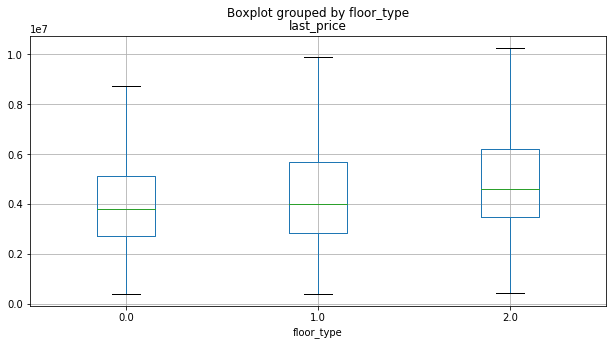

In [382]:

flats.boxplot('last_price', by='floor_type', showfliers=False, figsize=(10, 5))

### Выделим 10 населенных пунктов с наибольшим количеством объявлений:

Санкт-Петербург      13730
посёлок Мурино         522
посёлок Шушары         438
Всеволожск             394
Пушкин                 337
Колпино                335
посёлок Парголово      326
Гатчина                303
деревня Кудрово        298
Выборг                 232
Name: locality_name, dtype: int64

,last_price,m2_price
locality_name,,
Санкт-Петербург,6.846779e+06,108442.094520
Пушкин,6.302935e+06,102148.206600
деревня Кудрово,4.234158e+06,92473.547576
посёлок Парголово,4.488075e+06,90175.913458
посёлок Мурино,3.672049e+06,85752.189195
посёлок Шушары,4.108082e+06,78677.364217
Колпино,3.964021e+06,75424.579098
Гатчина,3.511741e+06,69294.601730
Всеволожск,3.737119e+06,67214.252635


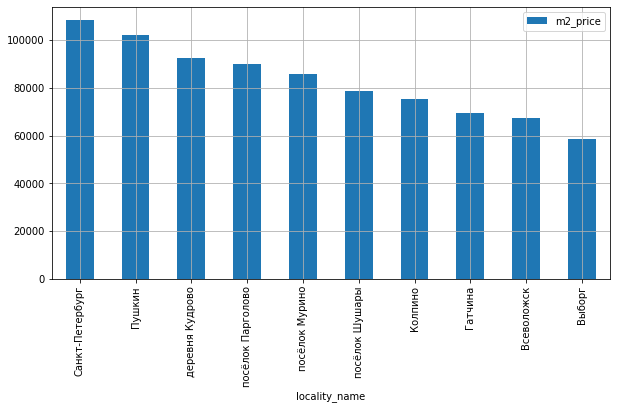

In [407]:
# Выбираем 10 первых строк таблицы отсортированной по количеству объявлений в городах
locality_name_10max = flats['locality_name'].value_counts()[:10]
display(locality_name_10max)

# Вычисляем среднюю цену и цену квадратного метра по этим городам из отфильтрованных данных
locality_10max_m2_mean = (
    good_data_m2_price
    .query('locality_name in @locality_name_10max.index')
    .pivot_table(index='locality_name', values=('m2_price', 'last_price')).sort_values(by='m2_price', ascending=False)
)
display(locality_10max_m2_mean)
locality_10max_m2_mean.plot(y='m2_price', kind='bar', figsize=(10, 5),grid=True)

#### Вывод
Из 10 населенных пунктов с наибольшим числом объявлений самая высокая стоимость квадратного метра в Санкт-Петербурге (108,4 тыс. за кв. м.), самая низкая - в Выборге (58,6 тыс. за кв. м.).

### Выделим центральную зону Санкт-Петербурга

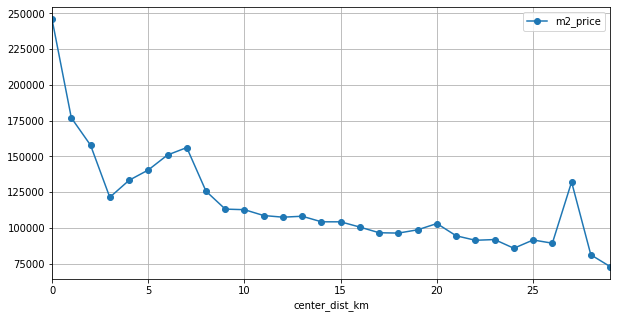

In [384]:
# Строим график зависимости средней цены квадратного метра от расстояния до центра
spb_data = flats_for_spb.query("locality_name == 'Санкт-Петербург'").copy()
spb_data['center_dist_km'] = round((flats_for_spb['cityCenters_nearest'] / 1000), 0)
spb_m2price_kmcenter = spb_data.pivot_table(index='center_dist_km', values='m2_price')
spb_m2price_kmcenter.plot(use_index=True, y='m2_price', style='o-', xlim=(0, 29), grid=True, figsize=(10, 5))

#### Вывод
Центральная зона в отношении стоимости квадратного метра в Санкт-Петербурге - 7 км от центра.

### Рассмотрим сегмент квартир в центре Санкт-Петербурга:

In [385]:
spb_center_data = spb_data.query('center_dist_km <= 7')
display(spb_center_data.shape)
display(spb_center_data['last_price'].describe())

(3525, 30)

count    3.525000e+03
mean     1.489553e+07
std      2.432091e+07
min      1.600000e+06
25%      6.690000e+06
50%      9.200000e+06
75%      1.450000e+07
max      7.630000e+08
Name: last_price, dtype: float64

#### Вывод
Средняя цена квартиры в центре Санкт-Петербурга 14,9 млн. руб. Количество объектов в центре 3525.

### Создадим функцию для вывода сравнительных гистограмм параметров для Санкт-Петербугра и его центра

In [386]:
# Создаем функцию для вывода сравнительных гистограмм по данным для Санкт-Петербугра и его центра
def spb_and_centerspb(namecol, vmin, vmax, nbins):
    fig = plt.figure()
    ax1 = fig.add_subplot()

    ax1.hist(spb_center_data[namecol], bins=nbins, range= (vmin, vmax), alpha=0.6, color='#deb0b0')

    ax2 = ax1.twinx()
    ax2.hist(spb_data[namecol], bins=nbins, range= (vmin, vmax), alpha=0.6, color='#b0c4de')

    ax1.yaxis.set_ticks_position("right")
    ax1.set_ylabel('spb_data\n\n', color='tab:blue', fontsize=13)

    ax2.yaxis.set_ticks_position("left")
    ax2.set_ylabel('\n\nspb_center_data', color='tab:red', fontsize=13)

    plt.tight_layout()
    plt.title(namecol)
    plt.show()

    plt.figure(figsize=(6, 1))
    spb_center_data.boxplot(namecol, vert=False)
    plt.xlim(vmin, vmax)
    plt.yticks(rotation=70)
    plt.title('spb_center_data')
    plt.show()
    display(spb_center_data[namecol].describe())

    plt.figure(figsize=(6, 1))
    spb_data.boxplot(namecol, vert=False)
    plt.xlim(vmin, vmax)
    plt.yticks(rotation=70)
    plt.title('spb_data')
    plt.show()
    display(spb_data[namecol].describe())
    
    return

### Сравнение по площади

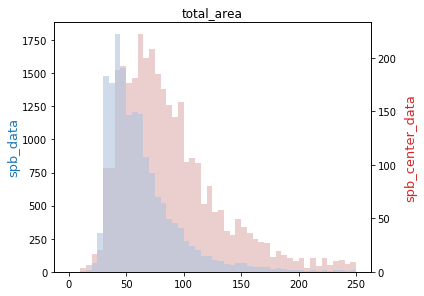

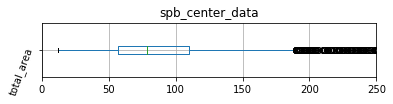

count    3525.000000
mean       93.168641
std        59.473561
min        12.000000
25%        57.000000
50%        78.700000
75%       110.000000
max       631.200000
Name: total_area, dtype: float64

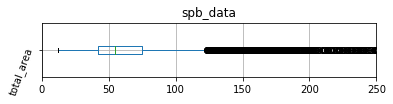

count    15721.000000
mean        64.751488
std         40.417095
min         12.000000
25%         42.000000
50%         55.000000
75%         74.600000
max        900.000000
Name: total_area, dtype: float64

In [387]:
spb_and_centerspb('total_area', 0, 250, 50)

#### Выводы
В центре:
- средняя площадь - 93 кв. м.
- медианная площадь - 78 кв. м.
- максимальное количество квартир приходится на диапазон 50-100 кв. м.

По городу в целом:
- средняя площадь - 64.8 кв. м.
- медианная площадь - 55 кв. м.
- максимальное количество квартир приходится на диапазон 30-70 кв. м.

### Сравнение по цене

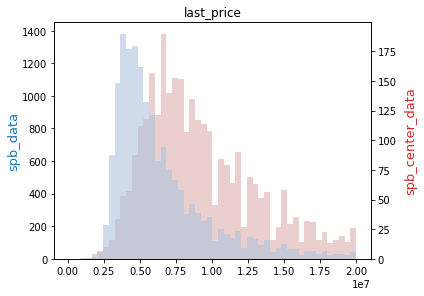

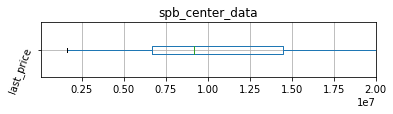

count    3.525000e+03
mean     1.489553e+07
std      2.432091e+07
min      1.600000e+06
25%      6.690000e+06
50%      9.200000e+06
75%      1.450000e+07
max      7.630000e+08
Name: last_price, dtype: float64

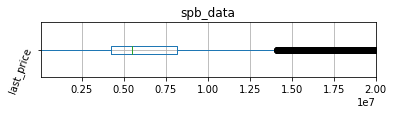

count    1.572100e+04
mean     8.062507e+06
std      1.301313e+07
min      1.219000e+04
25%      4.200000e+06
50%      5.500000e+06
75%      8.160000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [388]:
spb_and_centerspb('last_price', 50000, 20000000, 50)

#### Выводы
В центре:
- средняя цена - 14.9 млн. руб.
- медианная цена - 9.2 млн. руб.
- максимальное количество квартир приходится на диапазон 5-12 млн. руб.

По городу в целом:
- средняя цена - 8 млн. руб.
- медианная цена - 5.5 млн. руб.
- максимальное количество квартир приходится на диапазон 3-5 млн. руб.

### Сравнение по  количеству комнат в квартирах

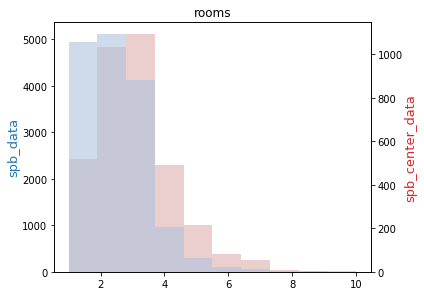

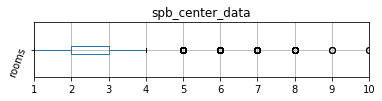

count    3525.000000
mean        2.834326
std         1.449808
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max        19.000000
Name: rooms, dtype: float64

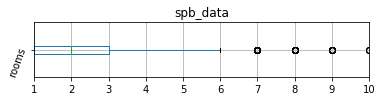

count    15721.000000
mean         2.171618
std          1.148098
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [389]:
spb_and_centerspb('rooms', 1, 10, 10)

#### Вывод
В центре:
- максимальное количество квартир двух- и трехкомнатные

По городу в целом:
- максимальное количество квартир одно- и двухкомнатные, примерно на 20% меньше трехкомнатных

### Сравнение по высоте потолков

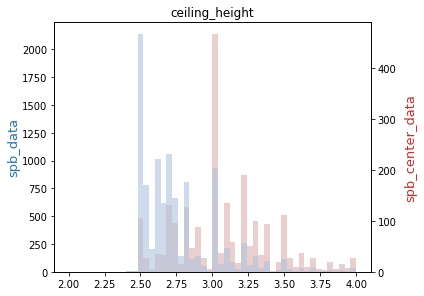

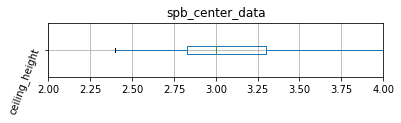

count    2286.000000
mean        3.118609
std         0.871873
min         2.400000
25%         2.830000
50%         3.000000
75%         3.300000
max        32.000000
Name: ceiling_height, dtype: float64

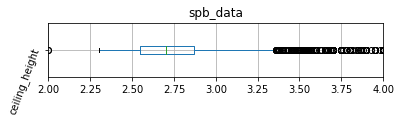

count    10104.000000
mean         2.803709
std          1.296912
min          1.000000
25%          2.550000
50%          2.700000
75%          2.870000
max        100.000000
Name: ceiling_height, dtype: float64

In [390]:
spb_and_centerspb('ceiling_height', 2, 4, 50)

#### Вывод
В центре:
- большинство квартир имеют высоту потолков от 3 до 3.5 метров

По городу в целом:
- большинство квартир имеют высоту потолков от 2.5 до 3 метров

### Сравнение по длительности размещения объявления

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


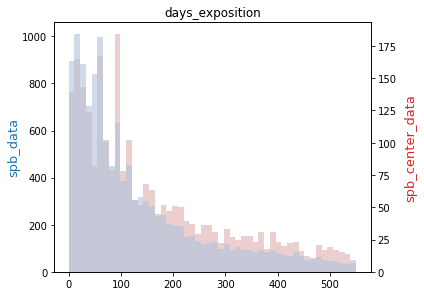

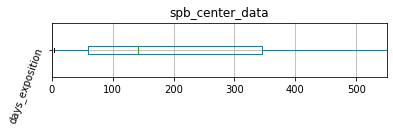

count    2941.000000
mean      247.676641
std       273.540907
min         3.000000
25%        60.000000
50%       142.000000
75%       346.000000
max      1572.000000
Name: days_exposition, dtype: float64

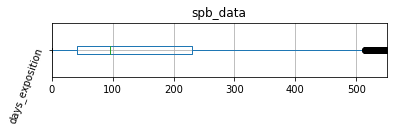

count    13638.000000
mean       182.792198
std        224.719204
min          1.000000
25%         42.000000
50%         95.000000
75%        231.000000
max       1572.000000
Name: days_exposition, dtype: float64

In [391]:
spb_data.dropna(subset=['days_exposition'], inplace=True)
spb_center_data.dropna(subset=['days_exposition'], inplace=True)

spb_and_centerspb('days_exposition', 0, 550, 50)

#### Выводы
В центре:
- среднее время продажи - 248 дней
- медианное время продажи - 142 дня

По городу в целом:
- среднее время продажи - 183 дня
- медианное время продажи  - 95 дней

Квартиры в центре продаются примерно в 1.5 раза дольше.

### Построим корреляционные матрицы для центра Санкт-Петербурга:

In [392]:
# Уберем цены выше 50 млн. для Санкт-Петербурга
spb_center_goodprice = spb_center_data.query('0 <= last_price <= 50000000')

(spb_center_goodprice
     .corr()['last_price']
     .to_frame()
     .sort_values('last_price', ascending=False)
     .style
     .background_gradient(cmap="Greens")
)

,last_price
last_price,1
total_area,0.715678
m2_price,0.628556
living_area,0.600662
kitchen_area,0.535294
rooms,0.450836
floor,0.142222
total_images,0.137804
floor_type,0.135382
airports_nearest,0.134936


Для центра имеется та же группа факторов с выраженным влиянием на цену: общая площадь, цена квадратного метра, жилая площадь, площадь кухни, количество комнат. Однако здесь расстояние до центра города не играет никакой роли.

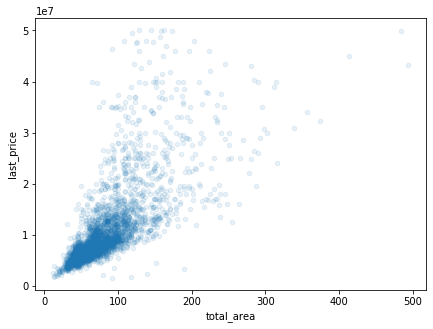

Коэффициент корреляции цены с площадью:  0.715677991100583


In [393]:
# Строим корреляционную матрицу параметров: цена - цена кв. м. - площадь - количество комнат - расстояние до центра
# spb_center_m2_area_rooms_center = pd.concat([spb_center_goodprice['last_price'], spb_center_goodprice['m2_price'], spb_center_goodprice['total_area'] , spb_center_goodprice['rooms'], spb_center_goodprice['cityCenters_nearest']], axis=1)
# plt.figure()
# pd.plotting.scatter_matrix(spb_center_m2_area_rooms_center, figsize=(12, 12))
# plt.show()
# spb_center_m2_area_rooms_center.corr()

# Зависимость площадь-цена
spb_center_goodprice.plot(x='total_area', y='last_price', figsize=(7, 5), kind='scatter', alpha=0.1)
plt.show()
print('Коэффициент корреляции цены с площадью: ', spb_center_goodprice['total_area'].corr(spb_center_goodprice['last_price']))

Корреляцию наглядно видно на графике: цены растут с увеличением площади.

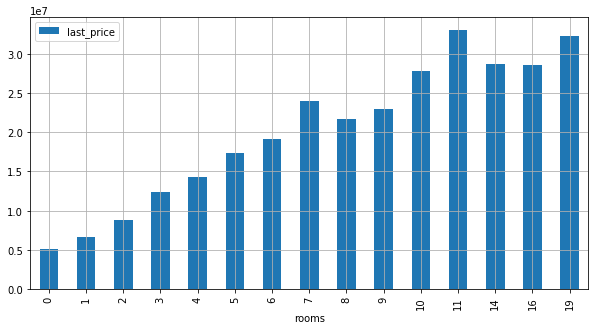

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Коэффициент корреляции цены с количеством комнат:  0.4508362601086076


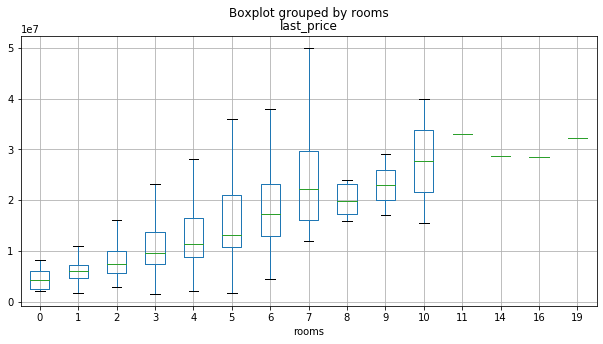

In [408]:
# Зависимость количество комнат-цена
spb_center_goodprice.pivot_table(index='rooms', values='last_price').plot(kind='bar', y='last_price', figsize=(10, 5),grid=True)
plt.show()
spb_center_goodprice.boxplot('last_price', by='rooms', showfliers=False, figsize=(10, 5))
print('Коэффициент корреляции цены с количеством комнат: ', spb_center_goodprice['rooms'].corr(spb_center_goodprice['last_price']))

Чем больше комнат в квартире, тем выше ее цена. Однако начиная с 11 комнат увеличение их количества практически не увеличивает цену.

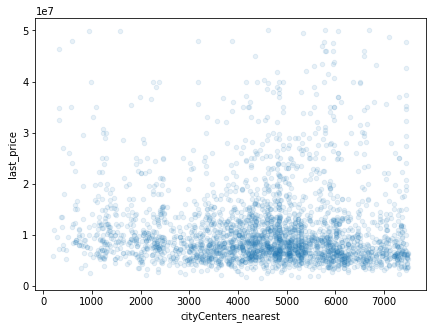

In [395]:
# Зависимость расстояние до центра-цена
spb_center_goodprice.plot(x='cityCenters_nearest', y='last_price', figsize=(7, 5), kind='scatter', alpha=0.1)
plt.show()

Зависимости от расстояния практически нет.

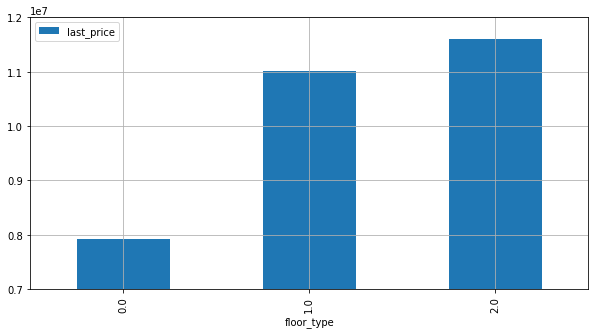

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


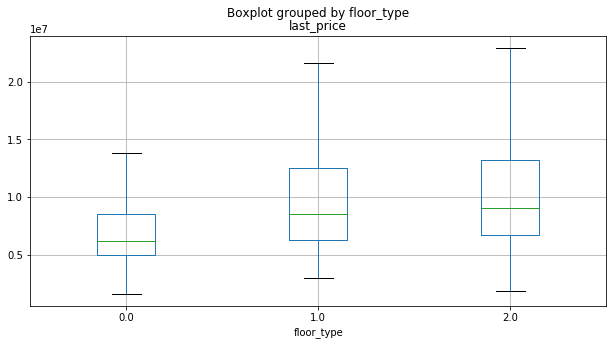

In [411]:
# Зависимость тип этажа-цена
spb_center_goodprice.pivot_table(index='floor_type', values='last_price').plot(kind='bar', y='last_price', figsize=(10, 5), ylim=(7000000, 12000000), grid=True)
plt.show()
spb_center_goodprice.boxplot('last_price', by='floor_type', showfliers=False, figsize=(10, 5))

В центре у первого этажа также самая низкая средняя цена (около 8 млн.) и самый меньший разброс цен. Средняя цена последнего этажа значительно выше - около 11 млн. Средняя цена у типа этажа "Другой" еще немного выше - около 11,5 млн.

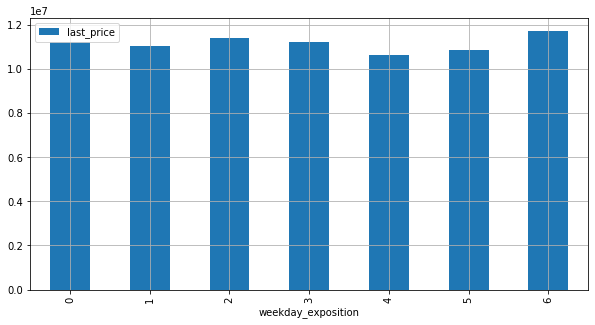

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


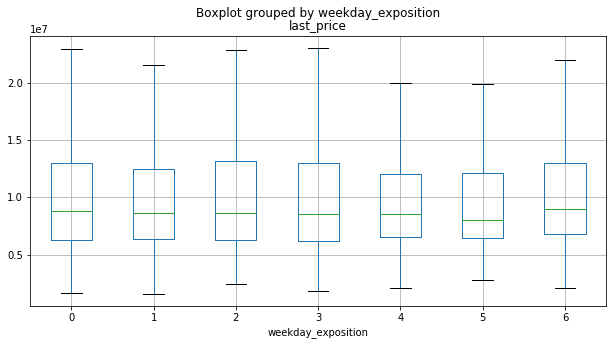

In [412]:
# Зависимость день недели размещения-цена
spb_center_goodprice.pivot_table(index='weekday_exposition', values='last_price').plot(kind='bar', y='last_price', figsize=(10, 5), grid=True)
plt.show()
spb_center_goodprice.boxplot('last_price', by='weekday_exposition', showfliers=False, figsize=(10, 5))

В центре также день недели размещения объявления практически не влияет на цену.

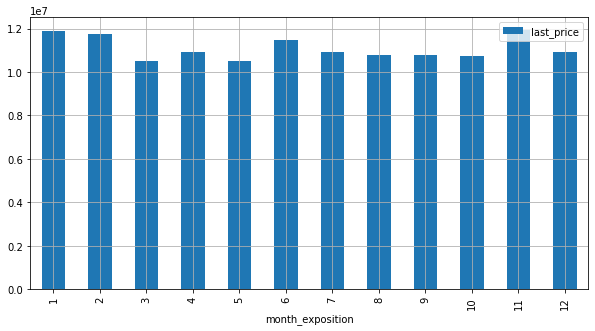

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


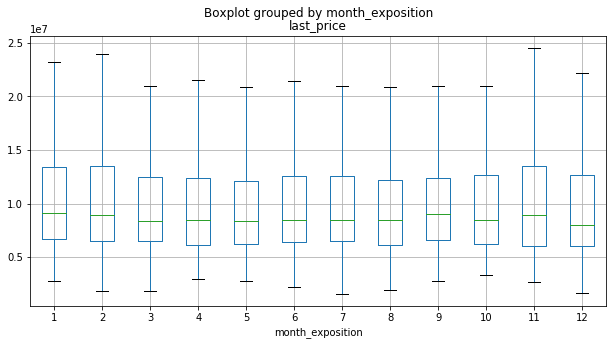

In [413]:
# Зависимость месяц размещения-цена
spb_center_goodprice.pivot_table(index='month_exposition', values='last_price').plot(kind='bar', y='last_price', figsize=(10, 5), grid=True)
plt.show()
spb_center_goodprice.boxplot('last_price', by='month_exposition', showfliers=False, figsize=(10, 5))

Месяц размещения объявления тоже практически не влияет на цену.

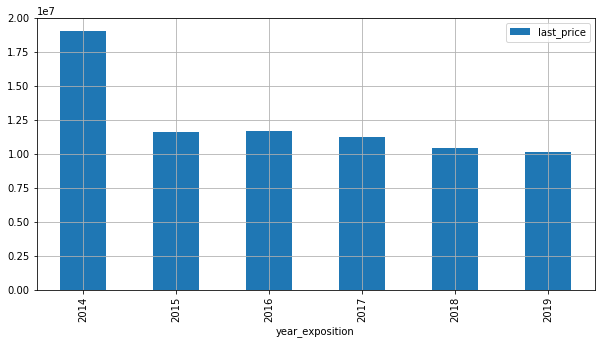

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


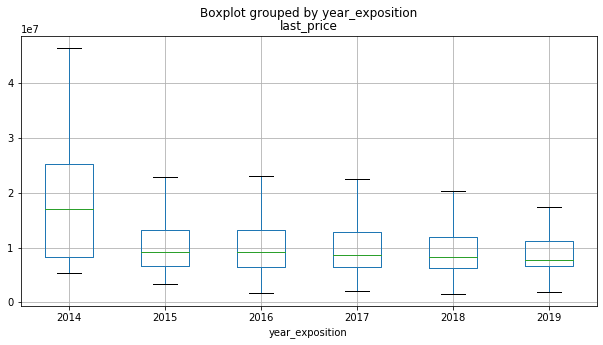

0.6097230641864221

In [414]:
# Зависимость год размещения-цена
spb_center_goodprice.pivot_table(index='year_exposition', values='last_price').plot(kind='bar', y='last_price', figsize=(10, 5), grid=True)
plt.show()
spb_center_goodprice.boxplot('last_price', by='year_exposition', showfliers=False, figsize=(10, 5))
plt.show()

p2014 = spb_center_goodprice.pivot_table(index='year_exposition', values='last_price').loc[2014, 'last_price']
p2015 = spb_center_goodprice.pivot_table(index='year_exposition', values='last_price').loc[2015, 'last_price']
display(p2015/p2014)


В 2015 году средние цены по сравнению с 2014 в центре упали примерно на 40 % и с тех пор сильно не изменились.

#### Вывод
Факторы влияния на цену квартиры в центре Санкт-Петербурге такие же как и по всему городу. Отличие только в расстоянии до центра - здесь оно не имеет значения.

Еще одно значимое отличие - резкое (на 40 %) падение цен в 2015 году по отношению к предыдущему и сохранение их уровня до 2019 года.

In [400]:
# Строим корреляционную матрицу параметров: цена - цена кв. м. - этаж - признак этажа
# spb_center_price_m2_floor_floortype = pd.concat([spb_center_goodprice['last_price'], spb_center_goodprice['m2_price'], spb_center_goodprice['floor'], spb_center_goodprice['floor_type']], axis=1)
# plt.figure()
# pd.plotting.scatter_matrix(spb_center_price_m2_floor_floortype, figsize=(12, 12))
# plt.show()
# spb_center_price_m2_floor_floortype.corr()

In [401]:
# Строим корреляционную матрицу параметров: цена - цена кв. м. - неделя размещени -месяц размещение - год размещения
# spb_center_w_m_y_exposition = pd.concat([spb_center_goodprice['last_price'], spb_center_goodprice['m2_price'], spb_center_goodprice['weekday_exposition'], spb_center_goodprice['month_exposition'], spb_center_goodprice['year_exposition']], axis=1)
# plt.figure()
# pd.plotting.scatter_matrix(spb_center_w_m_y_exposition, figsize=(12, 12))
# plt.show()
# spb_center_w_m_y_exposition.corr()

### Шаг 5. Общий вывод

---
#### Факторы влияния на цену

Основные факторы влияния на стоимость квартир:
- общая площадь
- цена квадратного метра
- жилая площадь
- площадь кухни
- количество комнат
- расстояние до центра города. 

Для центральной части Санкт-Петербурга факторы влияния на цену те же, за исключением расстояния до центра, здесь оно на цену практически не влияет.

---
#### Время продажи

Среднее время размещения объявления по всем данным и для Санкт-Петербурга около 180 дней, при этом к быстрым продажам можно 
срок до 45 дней, долгим продажам срок более 232 дней, очень долгим - более 512 дней. В центре Санкт-Петербурга длительность продаж в среднем выше примерно в 1.5 раза.

---
#### Характеристики квартир

Средняя цена, млн. руб.:
- Центр Санкт-Петербурга - 14.9
- Санкт-Петербург - 9.2
- По всем данным - 4.9

Средняя площадь:
- Центр Санкт-Петербурга - 93 кв. м.
- Санкт-Петербург - 64.8 кв. м

Количество комнат:
- Центр Санкт-Петербурга - в основном двух- и трехкомнатные
- Санкт-Петербург - в основном одно- и двухкомнатные

Высота потолков:
- Центр Санкт-Петербурга - от 3 до 3.5 метров
- Санкт-Петербург - от 2.5 до 3 метров

